In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd . read_csv("C:/Users/HP/Desktop/green_tech_data.csv")

In [3]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [4]:
data.tail()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0
99,87.761999,801.887991,0.085347,3.895443,0


In [5]:
data.shape

(100, 5)

In [6]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [7]:
data.describe(include='all')# with include all we can add all the features of any datatype even of objects type datatype too

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [8]:
data.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [10]:
data.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [11]:
data.axes

[RangeIndex(start=0, stop=100, step=1),
 Index(['carbon_emissions', 'energy_output', 'renewability_index',
        'cost_efficiency', 'sustainability'],
       dtype='object')]

In [12]:
data.isnull().sum().sum()

np.int64(0)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carbon_emissions,100.0,214.563260,104.121294,51.932741,117.620266,212.449859,305.571092,395.410428
energy_output,100.0,548.048551,263.800127,106.256917,317.804074,555.062371,789.565238,987.085409
renewability_index,100.0,0.517601,0.293426,0.005062,0.276880,0.562555,0.752367,0.990054
cost_efficiency,100.0,2.710170,1.320535,0.564771,1.623267,2.793732,3.810999,4.957273
sustainability,100.0,0.150000,0.358870,0.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
x = data[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y = data['sustainability']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
pred = model.predict(x_test)

In [18]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [19]:
accuracy=accuracy_score(y_test,pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


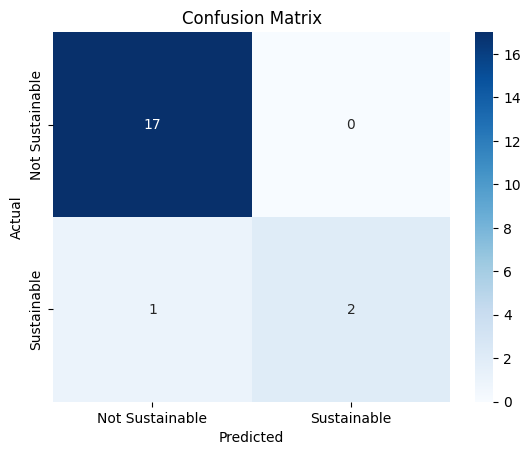

In [20]:
conf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
           xticklabels=['Not Sustainable','Sustainable'],
           yticklabels=['Not Sustainable','Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test,pred,target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [22]:
coefficients=pd.DataFrame(model.coef_.T,index=x.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [23]:
import joblib
joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']